In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import PIL
import PIL.Image
opt = SGD(lr=0.1)

In [2]:
train_dir = Path("train/")
val_dir = Path("validation/")

In [3]:
image_count = len(list(train_dir.glob("*/*.jpeg")))

In [4]:
image_count

16593

In [5]:
children = list(train_dir.glob("children/*.jpeg"))

In [6]:
adult = list(train_dir.glob("adult/*.jpeg"))

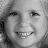

In [7]:
PIL.Image.open(str(children[0]))

In [8]:
children[0]

PosixPath('train/children/children_4837.jpeg')

In [9]:
batch_size = 16
img_height = 48
img_width = 48

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 16593 images belonging to 5 classes.


In [12]:
val_ds = train_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6400 images belonging to 5 classes.


In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(32, 32),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation="relu", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(5, activation="softmax")]
)

In [79]:
model.build()

In [15]:
model.compile(
    loss = "categorical_crossentropy", 
    optimizer = opt,
    metrics=["accuracy"]
)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [17]:
model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
1038/1038 [==============================] - 35s 34ms/step - loss: 2.5937 - accuracy: 0.4061 - val_loss: 2.2745 - val_accuracy: 0.4728
Epoch 2/20
1038/1038 [==============================] - 35s 34ms/step - loss: 2.0309 - accuracy: 0.4949 - val_loss: 1.8309 - val_accuracy: 0.4936
Epoch 3/20
1038/1038 [==============================] - 35s 34ms/step - loss: 1.7076 - accuracy: 0.5285 - val_loss: 1.5888 - val_accuracy: 0.5362
Epoch 4/20
1038/1038 [==============================] - 35s 34ms/step - loss: 1.5104 - accuracy: 0.5404 - val_loss: 1.4574 - val_accuracy: 0.5384
Epoch 5/20
1038/1038 [==============================] - 36s 34ms/step - loss: 1.3777 - accuracy: 0.5529 - val_loss: 1.3435 - val_accuracy: 0.5556
Epoch 6/20
1038/1038 [==============================] - 36s 34ms/step - loss: 1.2961 - accuracy: 0.5739 - val_loss: 1.3558 - val_accuracy: 0.5380
Epoch 7/20
1038/1038 [==============================] - 36s 35ms/step - loss: 1.2363 - accuracy: 0.5852 - val_loss: 1.3428 -

In [ ]:
model.evaluate